# __Supervised Learning__

There are two major types of supervised machine learning problems:
- Classification
- Regression

In __classification__ the goal is to preidct a class label, which is a choice from a __predefined__ list of
possibilities. __Classification__ is sometimes separated into __binary classification__, which is the special case of distinguishing between exactly two classes, and __multiclass classification__. which is classification between more than two classes.

In binary classification we often speak of one class being the posi‐
tive class and the other class being the negative class. Here, positive
doesn’t represent having benefit or value, but rather what the object
of the study is. So, when looking for spam, “positive” could mean
the spam class. Which of the two classes is called positive is often a
subjective matter, and specific to the domain.

For __regression__ tasks, the goal is to predict a __continuous__ number, or a __floating-point__
number in programming terms (or real number in mathematical terms).

If a _model_ is able to make accurate predictions on unseen data, we say it is able to __generalize__ from the training set to the test set.

Building a model that is too complex for the amount of information we have is called __overfitting__.

Choosing too simple a model is called __underfitting__.

The more complex we allow our model to be, the better we will be able to predict on
the training data. However, if our model becomes too complex, we start focusing too
much on each individual data point in our training set, and the model will not gener‐
alize well to new data.
There is a sweet spot in between that will yield the best generalization performance.
This is the model we want to find.

#### __Relation of Model Complexity to Dataset Size__
It’s important to note that model complexity is intimately tied to the variation of
inputs contained in your training dataset: the larger variety of data points your data‐
set contains, the more complex a model you can use without overfitting. Usually, col‐
lecting more data points will yield more variety, so larger datasets allow building
more complex models. However, simply duplicating the same data points or collect‐
ing very similar data will not help.

## __Some common Supervised Learning Algorithms__

X.shape: (26, 2)


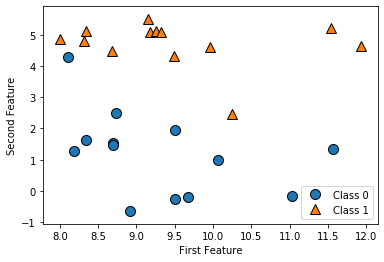

In [6]:
# create a dataset to pay with for Binary Classification 
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()

# plot the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print(f'X.shape: {X.shape}')

Text(0, 0.5, 'Target')

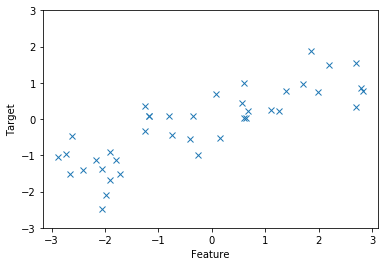

In [8]:
# create a dataset to pay with for Regression
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'x')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [9]:
# we will also use the Cancer and Boston Housing datasets
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

### __K - Nearest Neighbors__ (Classification)

The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


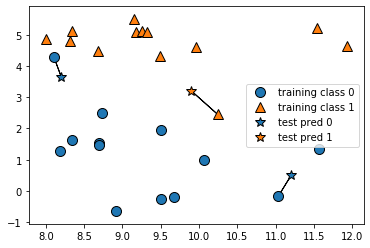

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


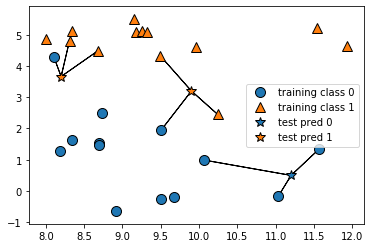

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

While this illustration is for a binary classification problem, this method can be
applied to datasets with any number of classes. For more classes, we count how many
neighbors belong to each class and again predict the most common class.

In [15]:
# implement KNN with scikit learn
from sklearn.model_selection import train_test_split

In [17]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [18]:
# import classifier class and initialize it
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [19]:
# fit the classifier or model to the training data
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
# Evaluate model
print(f'test accuracy: {classifier.score(X_test, y_test):.2f}')

test accuracy: 0.86


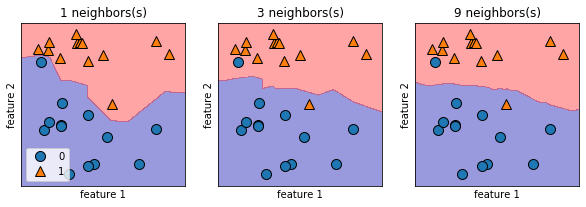

In [24]:
# plotting the decisions boundary for the KNN classifier
fig, axes = plt.subplots(1, 3, figsize = (10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can
    # instantiate and fit one line
    classifier = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(classifier, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(f'{n_neighbors} neighbors(s)')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

axes[0].legend(loc = 3)
plt.show()

As you can see on the left in the figure, using a single neighbor results in a decision
boundary that follows the training data closely. Considering more and more neigh bors leads to a smoother decision boundary. A smoother boundary corresponds to a
simpler model. In other words, using few neighbors corresponds to high model com plexity.

If you
consider the extreme case where the number of neighbors is the number of all data
points in the training set, each test point would have exactly the same neighbors (all
training points) and all predictions would be the same: the class that is most frequent
in the training set.

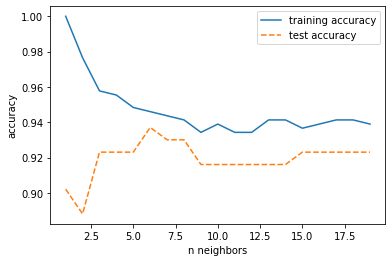

In [30]:
# Evaluate training and test set performance with different numbers
# of neighbors with the cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    # fit to training set
    model.fit(X_train, y_train)
    # record training and test sets accuracies
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy', )
plt.plot(neighbors_settings, test_accuracy,'--', label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n neighbors')
plt.legend()
plt.show()

#### __K - Nearest Neighbors__ (Reggresion)

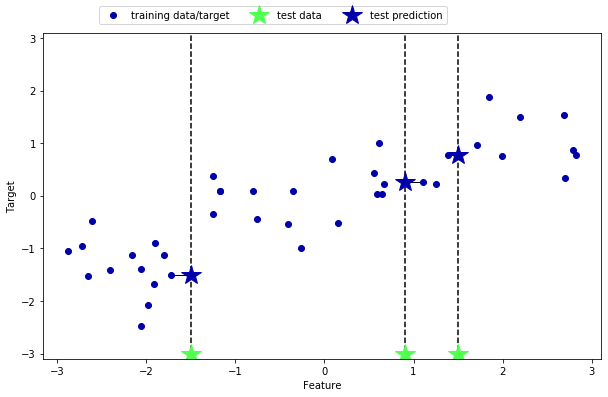

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

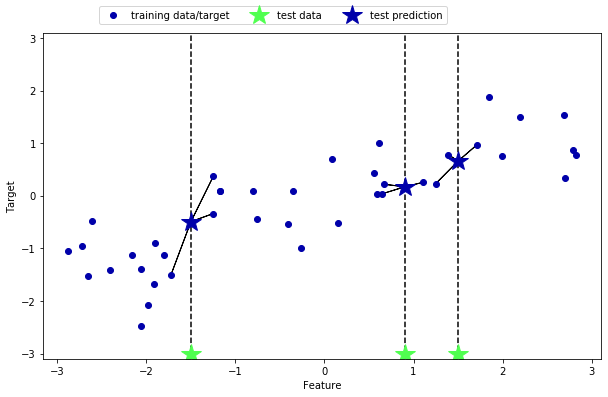

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

When using
multiple nearest neighbors, the prediction is the average, or mean, of the relevant
neighbors

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn . It’s used similarly to KNeighborsClassifier :

In [36]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate the model and set the number of neighbors to consider to 3
reggresion = KNeighborsRegressor(n_neighbors = 3)

# fit the regressor
reggresion.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [37]:
# evaluate the modeñ
print(f'test set r_squared: {reggresion.score(X_test, y_test):.2f}')

test set r_squared: 0.83


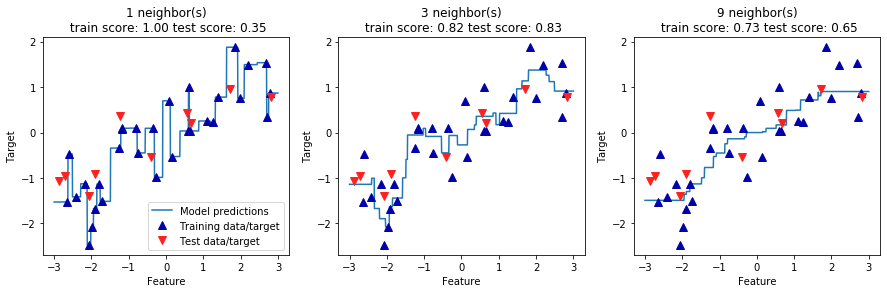

In [42]:
# Analyzing KNeighbors Regressor
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# create 1,000 datapoints evenly spaced between -3 and 3
import numpy as np
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    regression = KNeighborsRegressor(n_neighbors = n_neighbors)
    regression.fit(X_train, y_train)
    ax.plot(line, regression.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    train_score, test_score = regression.score(X_train, y_train), regression.score(X_test, y_test)
    ax.set_title(f'{n_neighbors} neighbor(s)\n train score: {train_score:.2f} test score: {test_score:.2f}')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = 'best')
plt.show()

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

In principle, there are two important parameters to the KNeighbors classifier: the
number of neighbors and how you measure distance between data points. In practice,
using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. Choosing the right distance measure is somewhat
beyond the scope of this book. By default, Euclidean distance is used, which works
well in many settings.

This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features
are 0 most of the time (so-called sparse datasets).

### __Linear Models for Regression__

For regression, the general prediction formila for a linear model looks as follows:

$$ \hat{y} = w[0] x [0] + w[1]x[1] + ... + w[p]x[p] + b $$

Here, x[0] to x[p] denotes the features (in this example, the number of features is p)
of a single data point, w and b are parameters of the model that are learned, and ŷ is
the prediction the model makes.

Here, w[0] is the slope and b is the y-axis offset. For more features, w contains the
slopes along each feature axis. Alternatively, you can think of the predicted response
as being a weighted sum of the input features, with weights (which can be negative)
given by the entries of w.

w[0]: 0.393906  b: -0.031804


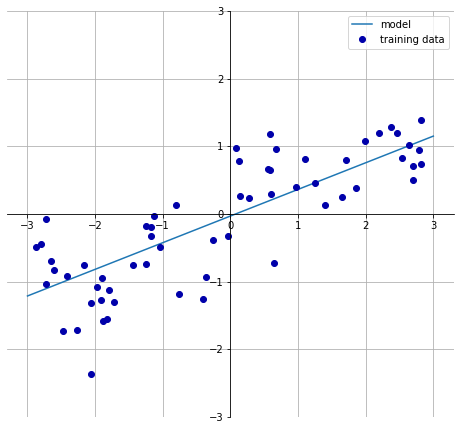

In [43]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as regression models for which the
prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is, when using more features).

If you compare the predictions made by the straight line with those made by the
KNeighborsRegressor using a straight line to make predictions seems
very restrictive. It looks like all the fine details of the data are lost. In a sense, this is
true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear
combination of the features. But looking at one-dimensional data gives a somewhat
skewed perspective. For datasets with many features, linear models can be very powerful.
In particular, if you have more features than training data points, any target y
can be perfectly modeled (on the training set) as a linear function.

Linear regression, or ordinary least squares (OLS), is the simplest and most classic lin‐
ear method for regression. Linear regression finds the parameters w and b that mini‐
mize the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences
between the predictions and the true values. Linear regression has no parameters,
which is a benefit, but it also has no way to control model complexity.

In [46]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# instantiate and fit to train set
lr = LinearRegression().fit(X_train, y_train)

In [48]:
# print attributes of the model
print(f'coefficient: {lr.coef_}')
print(f'interception: {lr.intercept_:.2f}')

coefficient: [0.39390555]
interception: -0.03


You might notice the strange-looking trailing underscore at the end
of coef_ and intercept_ . scikit-learn always stores anything
that is derived from the training data in attributes that end with a
trailing underscore. That is to separate them from parameters that
are set by the user.

In [50]:
# evaluate performance
print(f'training set score: {lr.score(X_train, y_train):.2f}')
print(f'test set score: {lr.score(X_train, y_train):.2f}')

training set score: 0.67
test set score: 0.67


An r_quared of around 0.66 is not very good, but we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. Let’s take a look at how LinearRe
gression performs on a more complex dataset, like the Boston Housing dataset.
Remember that this dataset has 506 samples and 105 derived features. First, we load
the dataset and split it into a training and a test set. Then we build the linear regression model as before:

In [51]:
# loading extended boston and fitting with a LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [52]:
print(f'training set score: {lr.score(X_train, y_train):.2f}')
print(f'test set score: {lr.score(X_test, y_test):.2f}')


training set score: 0.95
test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear
regression is ridge regression,